In [1]:
import os
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_dataset(filename):
     with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        next(lines)
        dataset = list(lines)
        data = np.array([[float(row[col_i]) for col_i in range(0,len(row))] for row in dataset])
        #print(data)
        return data

In [3]:
csv_features = 'question-2-features.csv'
features = get_dataset(csv_features)
features.shape

(506, 13)

In [4]:
csv_labels = 'question-2-labels.csv'
labels = get_dataset(csv_labels)
labels.shape

(506, 1)

In [5]:
def calculate_weights(features, labels):
    a = np.matmul(features.T,features)
    if np.isscalar(a):
        weights = np.matmul(1/a*features.T,labels)
    else:
        weights = np.matmul(np.matmul(np.linalg.inv(a),features.T),labels)
    return weights

In [6]:
def mean_squared_error(predictions, labels):
    mse = np.matmul((labels-predictions).T,(labels-predictions))/predictions.shape[0]
    return mse

In [7]:
#Q2.2
np.linalg.matrix_rank(np.matmul(features.T,features))


13

In [8]:
#Q2.3
LSTAT_features = np.array(features[:,12])
aaaa = np.ones((len(LSTAT_features),2))
f = np.insert(aaaa,1,LSTAT_features,axis = 1)
f =np.delete(f,2,1)
f

array([[1.  , 4.98],
       [1.  , 9.14],
       [1.  , 4.03],
       ...,
       [1.  , 5.64],
       [1.  , 6.48],
       [1.  , 7.88]])

In [9]:
weights = calculate_weights(f,labels)
weights.shape

(2, 1)

In [10]:
x = np.linspace (np.min(features[:,12]), np.max(features[:,12]), len(features[:,12]))
y = weights[0] + weights[1]*x

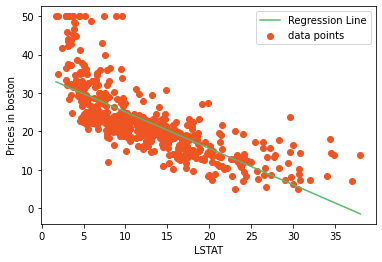

In [11]:
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(features[:,12], labels, c='#ef5423', label='data points')
plt.xlabel('LSTAT')
plt.ylabel('Prices in boston')
plt.legend()
plt.show()

In [12]:
LSTAT_Feature_polynomial = np.multiply(LSTAT_features,LSTAT_features)


In [13]:
aaaaa = np.ones((len(LSTAT_features),2))
f1 = np.insert(aaaa,1,LSTAT_features,axis = 1)
f1 = np.insert(f1,2,LSTAT_Feature_polynomial,axis = 1)
f1 = np.delete(f1,3,1)


In [14]:
polyweights = calculate_weights(f1,labels)
pre = polyweights[0] + polyweights[1]*x + polyweights[2]*np.multiply(x,x)


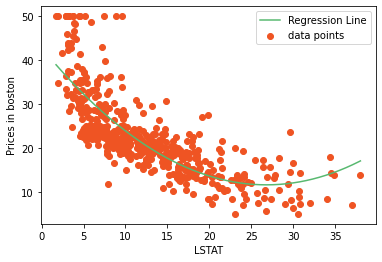

In [15]:
plt.plot(x, pre, color='#58b970', label='Regression Line')
plt.scatter(features[:,12], labels, c='#ef5423', label='data points')
plt.xlabel('LSTAT')
plt.ylabel('Prices in boston')
plt.legend()
plt.show()

In [28]:
poly_predicted_at_LSTAT = polyweights[0] + polyweights[1]*LSTAT_features + polyweights[2]*LSTAT_Feature_polynomial
lin_predicted_at_LSTAT = weights[0] + weights[1]*LSTAT_features 
pre = np.array([poly_predicted_at_LSTAT])
y = np.array([lin_predicted_at_LSTAT])

In [32]:
MSE_poly = mean_squared_error(pre.T,labels)
MSE_lin = mean_squared_error(y.T,labels)

In [36]:
MSE_lin

array([[38.48296723]])

In [35]:
MSE_poly

array([[30.33052008]])

In [37]:
weights

array([[34.55384088],
       [-0.95004935]])

In [38]:
polyweights

array([[42.86200733],
       [-2.3328211 ],
       [ 0.04354689]])